In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
stu_data=pd.read_csv(r"C:\Users\Atheena Jain\Downloads\StudentsPerformance.csv")

In [3]:
stu_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [4]:
stu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 1.How Many Males and Females Participated in the Test

In [5]:
stu_data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

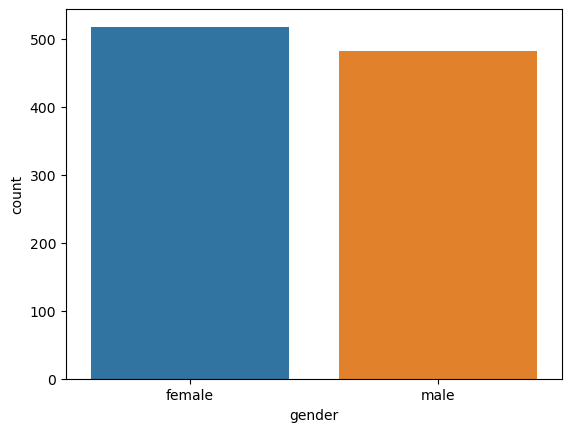

In [6]:
sns.countplot(x='gender',data=stu_data)
plt.show()

There are 518 females and 482 males participated in the test

# 2.Parental Level Education

In [7]:
stu_data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [8]:
stu_data['parental level of education'].mode()

0    some college
Name: parental level of education, dtype: object

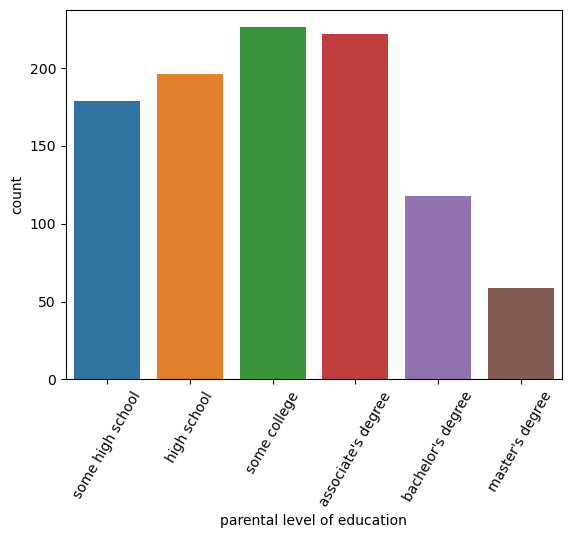

In [9]:
sns.countplot(x='parental level of education',data=stu_data)
plt.xticks(rotation=60)
plt.show()

Most parents have college level education and least have master's degree

# 3.Who scores the most on average for math,reading and writing based on gender and test preparation course

In [10]:
stu_data.groupby('gender')[['math score','reading score','writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


Males score most on average for math and females score most on average for reading and writing.

In [11]:
stu_data.groupby('test preparation course')[['math score','reading score','writing score']].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


Students who completed test preparation course score the most on average for math,reading and writing

# 4.Scoring variations for math,reading and writing based on gender and test preparation course

In [12]:
stu_data.groupby('gender')[['math score','reading score','writing score']].std()

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


In [13]:
stu_data.groupby('gender')[['math score','reading score','writing score']].var()

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


Females' scores have more variations

In [16]:
stu_data.groupby('test preparation course')[['math score','reading score','writing score']].std()

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


In [17]:
stu_data.groupby('test preparation course')[['math score','reading score','writing score']].var()

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


Scores of students who are not done any test preparation courses show more variations

# Top 25% students based on their math score

In [18]:
stu_data['math score'].quantile(0.75)

77.0

In [23]:
top25=stu_data[stu_data['math score']>=77].sort_values('math score',ascending=False)

In [24]:
top25

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
998,male,group E,associate's degree,free/reduced,completed,100,100,93
997,male,group D,some college,standard,completed,100,97,99
996,male,group A,some college,standard,completed,100,96,86
517,female,group E,associate's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
854,male,group D,some high school,standard,completed,77,68,69
855,male,group E,associate's degree,free/reduced,completed,77,69,68
856,male,group E,some high school,standard,completed,77,76,77
415,female,group B,master's degree,free/reduced,completed,77,97,94


In this data 75% of students' math score lies below 77. So sort out the students above 77 marks.